## Objectives 

The main tasks of this script:

- Implement functions in Python;
- Backpropagation with Matrices; and
- Constructing an $l$-layer neural network from scratch

In [1]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
import tensorflow as tf
import torch 
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt

print(f"\nPython environment:\n{sys.version}")
print("\nStatistical packages loaded: ")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"statsmodels: {statsmodels.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

print("\nDeep Learning packages loaded: ")
print(f"tensorflow: {tf.__version__}")
print(f"torch: {torch.__version__}")


print(f"\nRuntime location...")

# Detect if a GPU is present
has_gpu = len(tf.config.list_physical_devices('GPU')) != 0

print(f"GPU Enabled: {has_gpu}")

try:
  from google.colab import drive
  is_google_colab = True
except:
  is_google_colab = False

print(f"Google Colab: {is_google_colab}")
print(f"Local Notebook: {not is_google_colab}")



Python environment:
3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]

Statistical packages loaded: 
pandas: 1.3.5
numpy: 1.21.6
statsmodels: 0.12.2
matplotlib: 3.2.2

Deep Learning packages loaded: 
tensorflow: 2.9.2
torch: 1.12.1+cu113

Runtime location...
GPU Enabled: True
Google Colab: True
Local Notebook: False


## Reshaping Data

Reshaping data is a common requirement for working with neural networks. Previously, the assumption about data in neural networks
was that there is exactly _one_ example or image. In practice, there needs to
be a large amount of data for the neural network to function. Previously, $X$ was defined to be a single input vector: 

$$
X_{m \times 1} = \begin{bmatrix}
\vert \\
X^{(1)}  \\
\vert  \\
\end{bmatrix}_{m \times 1}
$$

To enable multiple training examples, let's define $X$ to be:

$$
X_{m \times n_e} = \begin{bmatrix}
\vert & \vert & \vert \\
X^{(1)} & X^{(2)} & X^{(3)} \\
\vert & \vert & \vert \\
\end{bmatrix}_{m \times n_e}
$$

where $m$ is the number of inputs and $n_e$ is the number of observations. Therefore, the linear combinations in $Z^{[1]}$ would now look like:

$$
Z^{[1]} = \begin{bmatrix}
\vert & \vert & \vert \\
Z^{[1](1)} & Z^{[1](2)} & Z^{[1](3)} \\
\vert & \vert & \vert \\
\end{bmatrix}_{n_h \times n_e}
$$

Let the parentheses -- $[]$ -- denote the layer number and the square brackets
-- $()$ -- be the training data example.

### (a) Reshaping Data Input

Having said this, please reshape the MNIST training data from:

$$\text{Examples }\times \text{Height } \times \text{Width }$$

To being shaped as:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m} \times \underbrace{\text{Examples }}_{=n_e}$$

where $m$ is the number of features and $n_e$ represents the number of observations.


Through this process, the data is being flattened:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m}$$

Therefore, we will have $m$ different pixels acting as features for the model.

_Hints:_

- Changing a data's shape is possible with [`np.reshape(data, (data.shape[0], -1))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape) and [`np.reshape(data, (-1, data.shape[0]))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape).
  - **Note:** `-1` denotes an unknown dimension and requests that NumPy determine it during the reshape. 
- Arrays can be transposed with [`data.T`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html)



We'll acess the MNIST Fashion data using TensorFlow's dataset module:

In [2]:
%%capture
import tensorflow as tf

# Import data
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Perform scaling
x_train, x_test = x_train / 255.0, x_test / 255.0 # [0, 255] -> [0, 1]

In [3]:
# import numpy as np
# y_test[:20]

With the data in hand, we must begin the process of reshaping it. 

In [4]:
import numpy as np

# code here 
x_train = np.reshape(x_train,(x_train.shape[0],-1)).T
x_test = np.reshape(x_test,(x_test.shape[0],-1)).T

# Please reshape the data into the new variables:
# x_train_reshaped and x_test_reshaped 
x_train_reshaped = x_train
x_test_reshaped = x_test

In [5]:
# Grading helper:
print(f'X Train Reshapped has dimensions: {x_train_reshaped.shape}')
print(f'X Test Reshapped has dimensions: {x_test_reshaped.shape}')

X Train Reshapped has dimensions: (784, 60000)
X Test Reshapped has dimensions: (784, 10000)


#### Aside: Data reshaping 

Having trouble re-organizing the data? Try modifying a smaller example case first. **This is not graded but is intended to allow exploration of how data changes in a minimal example.**

In [6]:
# Not graded code, acts a small test case
import numpy as np
a = np.arange(24).reshape((4, 3, 2))
print(f"Contents of `a` before transform:\n {a}\n")
print(f"Dimensions of `a` before transform:\n {a.shape}\n")

# This is just is a direct implementation of the hint. 
a2 = np.reshape(a, (-1, a.shape[0]))
print(f"Contents of `a2` after transform:\n {a2}\n")
print(f"Dimensions of `a2`:\n {a2.shape}\n")

# Use this line of code for reshaping x (correct method)
a3 = np.reshape(a, (a.shape[0], -1)).T
# test my code
# print("test my own code",np.reshape(a.T, (a.shape[1]*a.shape[2], -1)))
print(f"Contents of `a3` after transform:\n {a3}\n")
print(f"Dimensions of `a3`:\n {a3.shape}\n")

b = np.arange(3)
print(f"Contents of `b`:\n {b}\n")
print(f"Dimensions of `b`:\n {b.shape}\n")

Contents of `a` before transform:
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]

Dimensions of `a` before transform:
 (4, 3, 2)

Contents of `a2` after transform:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

Dimensions of `a2`:
 (6, 4)

Contents of `a3` after transform:
 [[ 0  6 12 18]
 [ 1  7 13 19]
 [ 2  8 14 20]
 [ 3  9 15 21]
 [ 4 10 16 22]
 [ 5 11 17 23]]

Dimensions of `a3`:
 (6, 4)

Contents of `b`:
 [0 1 2]

Dimensions of `b`:
 (3,)



### (b) Encoding Output

Encode the label data ($Y$) using one-hot encoding. 

The data has the following labels:

| Label|Class       |
|-----:|:-----------|
|     0|T-shirt/top |
|     1|Trouser     |
|     2|Pullover    |
|     3|Dress       |
|     4|Coat        |
|     5|Sandal      |
|     6|Shirt       |
|     7|Sneaker     |
|     8|Bag         |
|     9|Ankle boot  |




In [7]:
def encode_onehot(vec_index, n = None, dtype = float):
  vec_index = np.asarray(vec_index)
  n = np.max(vec_index) + 1 if n is None else n
  return np.eye(n, dtype = dtype)[vec_index].T

y_train_onehot = encode_onehot(y_train, n = None, dtype = int)
y_test_onehot = encode_onehot(y_test, n = None, dtype = int)

In [8]:
print(f'Y Train has dimensions: {y_train.shape}')
print(f'Y Train Onehot has dimensions: {y_train_onehot.shape}')
print(f'Y Test Onehot has dimensions: {y_test_onehot.shape}')
print(f'Number of Images: {y_train_onehot.shape[1]}')

Y Train has dimensions: (60000,)
Y Train Onehot has dimensions: (10, 60000)
Y Test Onehot has dimensions: (10, 10000)
Number of Images: 60000


Test case notes:

- `y_train_onehot` should have dimensions: (10, 60000)
- `Number of Images` should be: 60000.


## Architecting Infrastructure

Within this part, we'll construct general functions that can be used across neural networks. 

### (a) He initialization

Create a function to initialize weight parameters for a given layer in the neural network. The weight initialization should use [He initialization](https://arxiv.org/pdf/1502.01852.pdf) given by:

$$
\begin{align*}
W_{n^{[l]} \times n^{[l-1]}} &\sim \mathcal{N}\left(0, \sqrt{\frac{2}{n^{[l-1]}}}\right) \\
\end{align*}
$$

where $N$ is the normal distribution, $n^{[l-1]}$ denotes the number of input weights, and $n^{[l]}$ is the number of output weights.

Implementation Guidelines:

- **Arguments:**
    - `n_out`: Number of output weights
    - `n_in`: Number of input weights
- **Return:**
    - `W` a matrix of dimension $n^{[l]} \times n^{[l-1]}$

_Hints:_ 

- The standard normal distribution is given by $Z \sim N(0, 1)$ where $\mathcal{N}( \mu, \sigma)$.
- We can transform the standard deviation of the standard normal distribution by: 
$$a Z \sim a \mathcal{N}(0, 1) \sim \mathcal{N}(0, a).$$
- NumPy has a built in way of generating samples from a standard **Normal** distribution with [`np.random.randn(n, p)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). 

---



In [9]:
def he_initialization(n_out, n_in):
  # weight initialization
  # np.random.seed()
  W = np.sqrt(2/n_in) * np.random.randn(n_out,n_in)
  return W

### (b) Activation Functions

Implement the ReLU and Softmax activation functions alongside their derivatives.

There are a few considerations that need to be made when implementing these functions: 

1. Operate element-wise on a matrix of dimensions `a x b` organized by **row-major** form. 
2. Numerical stability

--- 

Implementation Guidelines for each function outside of softmax prime:

- **Arguments:**
    - `z` a matrix of dimension `a X b` in **row-major** form.
- **Return:**
    - Appropriately "activated" or "derivative" matrix of dimension `a X b`
      in **row-major** form.

**For the derivative of the softmax activation function, please implement the gradient as a combined operation that takes into account the cost function being Categorical Cross-Entropy.**

----

Implementation guidelines for the Softmax prime function under cross-categorical entropy (CCE): 

- **Arguments:**
    - `y` a matrix of true values with dimensions `n_C X n_e` in **row-major** form.
    - `y_hat` a matrix of **predicted** values with dimensions `n_C X n_e` in **row-major** form.
- **Return:**
    - Appropriate "derivative" matrix of dimension `n_C X n_E`
      in **row-major** form.

_Hint:_

Recall that a stable version of Softmax will subtract out the maximum value under a given set of observations within a vector. When stablizing a matrix version of Softmax, this requires **subtracting out the maximum value for a given column, _not_ the entire matrix.**

```python
z = np.arange(1, 11, 1).reshape(2, 5)
print(f"z:\n {z}")
# z: 
# [[ 1 2 3 4 5] 
# [ 6 7 8 9 10]]

max_overall = np.max(z)
print(f"overall z max: \n {max_overall}")
# overall z max: 10

max_by_column = np.max(z, axis = 0)
print(f"z max by column: \n {max_by_column}")
# z max by column: [ 6 7 8 9 10]

max_by_row = np.max(z, axis = 1)
print(f"z max by row: \n {max_by_row}")
# z max by row: [ 5 10]
```

As a result, make sure to use the appropriate axis (column, axis = 0) when finding the mean and taking the summation.


---

In [10]:
import numpy as np

# implement dense network layout (page50 in 04b-backprop-with-matrices.pdf)
# Code section for activation functions

def relu(z):
  # Code here
  z = np.array(z)
  a = z * (z > 0)
  return a

def relu_prime(z):
  # Code here
  z = np.array(z)
  prime = 1 * (z > 0) # g'(z): 1 if z > 0 else 0
  return prime

def softmax_stable(z):
  # Code here
  z = np.array(z)
  column_max = np.max(z,axis=0)
  stable = z - column_max

  # a = softmax_naive(stable)
  a = (np.exp(stable) / np.sum(np.exp(stable), axis = 0))
  return a

# def softmax_naive(z):
#   return (np.exp(z) / np.sum(np.exp(z), axis = 0))

def softmax_prime_under_cce(y, y_hat):
  # Code here
  y = np.array(y)
  y_hat = np.array(y_hat)
  n = y.shape[1]

  # the deduction of the following is written in the next question
  # j=c part
  # c = y*(1-y_hat)*(-1/n)
  # # j != c part
  # not_c = -y_hat*(1-y)*(-1/n)
  # prime = (c + not_c).T # denote as delta1 in the slide (the reason for transpose is to match the dimension)

  prime = 1/n*(y_hat-y).T

  return prime


### (c) Categorical Cross-Entropy Cost

Create a function that computes the categorical cross-entropy cost defined as:

$$
J\left(\mathbf{W}\right) = -\frac{1}{N} \sum_{i=1}^{N} { \sum_{c=1}^{C} { y_{ic} \log\left({ \hat y_{ic} }\right)  }}
$$

where

- $\mathbf{W}$ represents the weights of the neural network -- including the bias term,
- $N$ represents the number of examples ($n_e$) the network is being trained with,
- $y_{ic}$ is the true label in $c \in C$, and;
- $\hat y_{ic}$ is the predicted label probability in $c \in C$.

Implementation Guidelines:

- **Arguments:**
    - `Y_hat` a matrix containing the predictions with dimensions `n_C X n_e`.
    - `Y` a matrix containing the true values with dimensions `n_C X n_e`.
- **Return:**
    - `cost`: A single decimal value.




In [11]:
def CE(Y_hat,Y):
  c = Y.shape[0]
  cost = c * np.mean(-Y * np.log(Y_hat)) # because m = np.mean(xxx) = 1/(c*n_e) * sum(), so J(W) = c*m
  return cost

## Deriving a Neural Network!

In this block, we'll create a computational graph and compute the
appropriate backpropagation derivatives.

For this network, we're aiming to create an $L$-layer network that is decided upon run time. That is, the equations must be flexible enough to allow for $L$ layers to be constructed. We're specifically wanting:

```
Input -> ReLU (Repeat $L-1$ times) -> Linear/Identity ($L$) -> Softmax
```

Thus, we would like: 

| Layer        | W Shape     |	Bias Shape |	Linear       	|  Activation    | 
|:------------:|:------------|-------------|:---------------|:---------------|
| Layer 1	     | $(n^{[1]}, m)$   |	$(n^{[1]}, 1)$	 | $$\mathbf{Z}^{[1]} = \mathbf{W}^{[1]}\mathbf{x} + \mathbf{b}^{[1]}$$    | $$\mathbf{A}^{[1]} = \operatorname{ReLU}\left(\mathbf{Z}^{[1]}\right)$$ |
| Layer 2	     | $$(n^{[2]}, n^{[1]})$$ |	$(n^{[2]}, 1)$	 | $$\mathbf{Z}^{[2]} = \mathbf{W}^{[2]}\mathbf{A}^{[1]} + \mathbf{b}^{[2]}$$ | $$\mathbf{A}^{[2]} = \operatorname{ReLU}\left(\mathbf{Z}^{[2]}\right)$$ | 
| $\vdots$	     | $\vdots$|	$\vdots$	 | $\vdots$ |	$\vdots$ |
| Layer $L-1$	     | $(n^{[L-1]}, n^{[L-2]})$ |	$(n^{[L-1]}, 1)$	 | $$\mathbf{Z}^{[L-1]} = \mathbf{W}^{[L-1]}\mathbf{A}^{[L-2]} + \mathbf{b}^{[L-1]}$$ |	$$\mathbf{A}^{[L-1]} = \operatorname{ReLU}\left(\mathbf{Z}^{[L-1]}\right)$$ | 
| Layer $L$	     | $(n^{[L]}, n^{[L-1]})$ |	$(n^{[L]}, 1)$	 | $$\mathbf{Z}^{[L]} = \mathbf{W}^{[L]}\mathbf{A}^{[L-1]} + \mathbf{b}^{[L]}$$ |	$$\mathbf{A}^{[L]} = \operatorname{softmax}\left(\mathbf{Z}^{[L]}\right)$$ | 



Let the neurons in the first hidden layer be denoted as $n^{[1]}$ and the number of input neurons being $m$. Within subsequent layers, let $n^{[l]}$ denote the number of neurons in the layer. 

All layers should should include a bias term, $\mathbf{b}$ that is included separately from the weight matrix, $\mathbf{W}$, to make neuron counts per-layer $n^{[l]} + 1$. Finally, in the output layer $n^{[L]}$, apply the $\mathrm{softmax}(x)$ to obtain exactly $n_C$ neurons that correspond to $C$ classes the data could take.

For the cost function, we'll use categorical cross-entropy cost as we have $C$ categories.


### (a) Sketching the computational graph

Sketch the computational graph for the described neural network. For each layer on the graph, write out the forward propagation equations in matrix equation form. 

_Hint:_ For help with equations, look at the table above.



... insert diagram here ... 

$A^{[L]}$ here is actually the $\hat Y$:

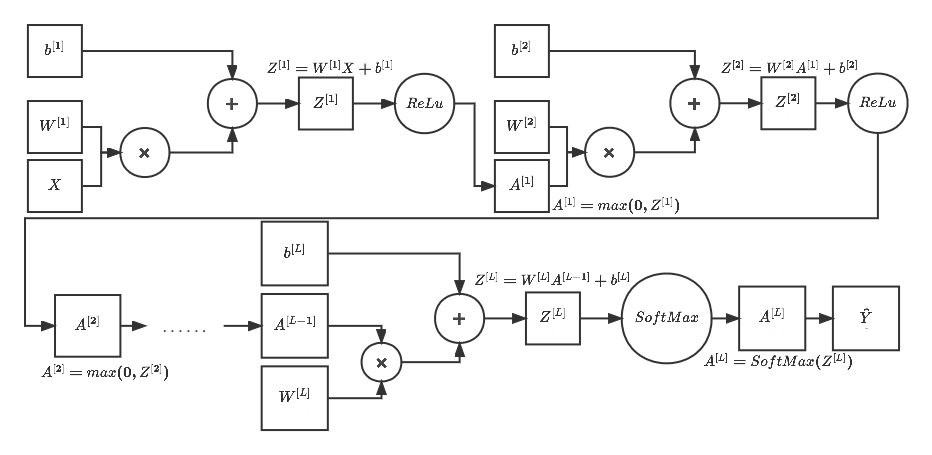

### [20 points] (b) Deriving the backward propagation equations

Within this step, derive the backward propagation equations for the network
by obtaining the necessary partial derivatives.



... insert formulas here ... 

gradient of matrix well explained: https://explained.ai/matrix-calculus/


<!-- $$
\frac{\partial \hat y_i}{\partial Z^{[L]}_j} = \Biggl\{ \begin{align*} 
\hat y_j(1-\hat y_j) \space Or \space \hat y_i(1-\hat y_i),i = j \\ 
-\hat y_j\hat y_i, i \ne j
\end{align*}
$$ -->


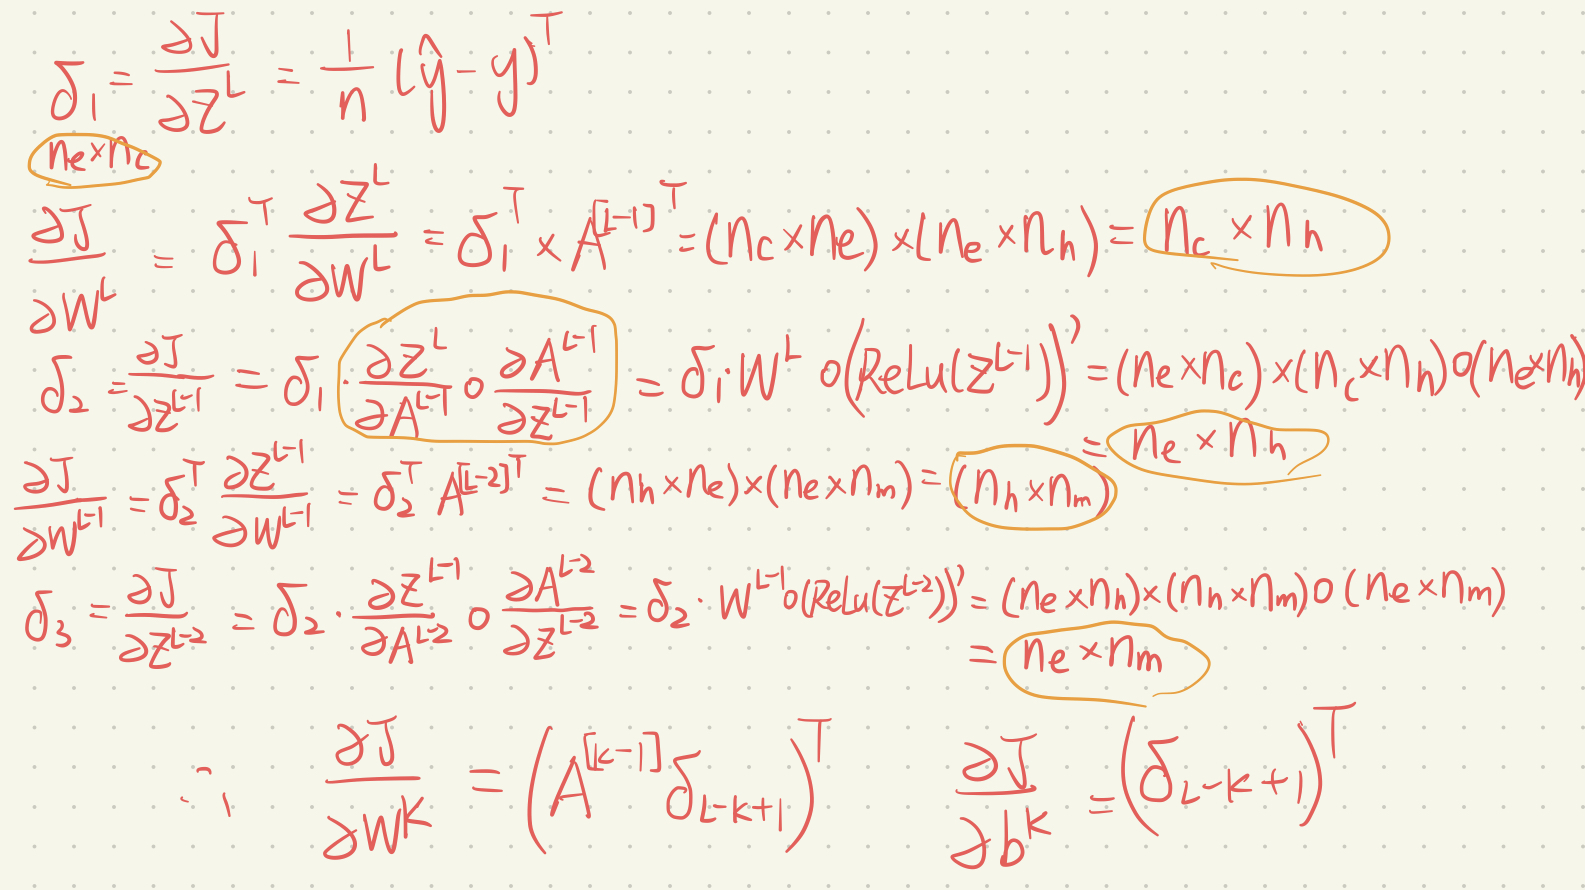

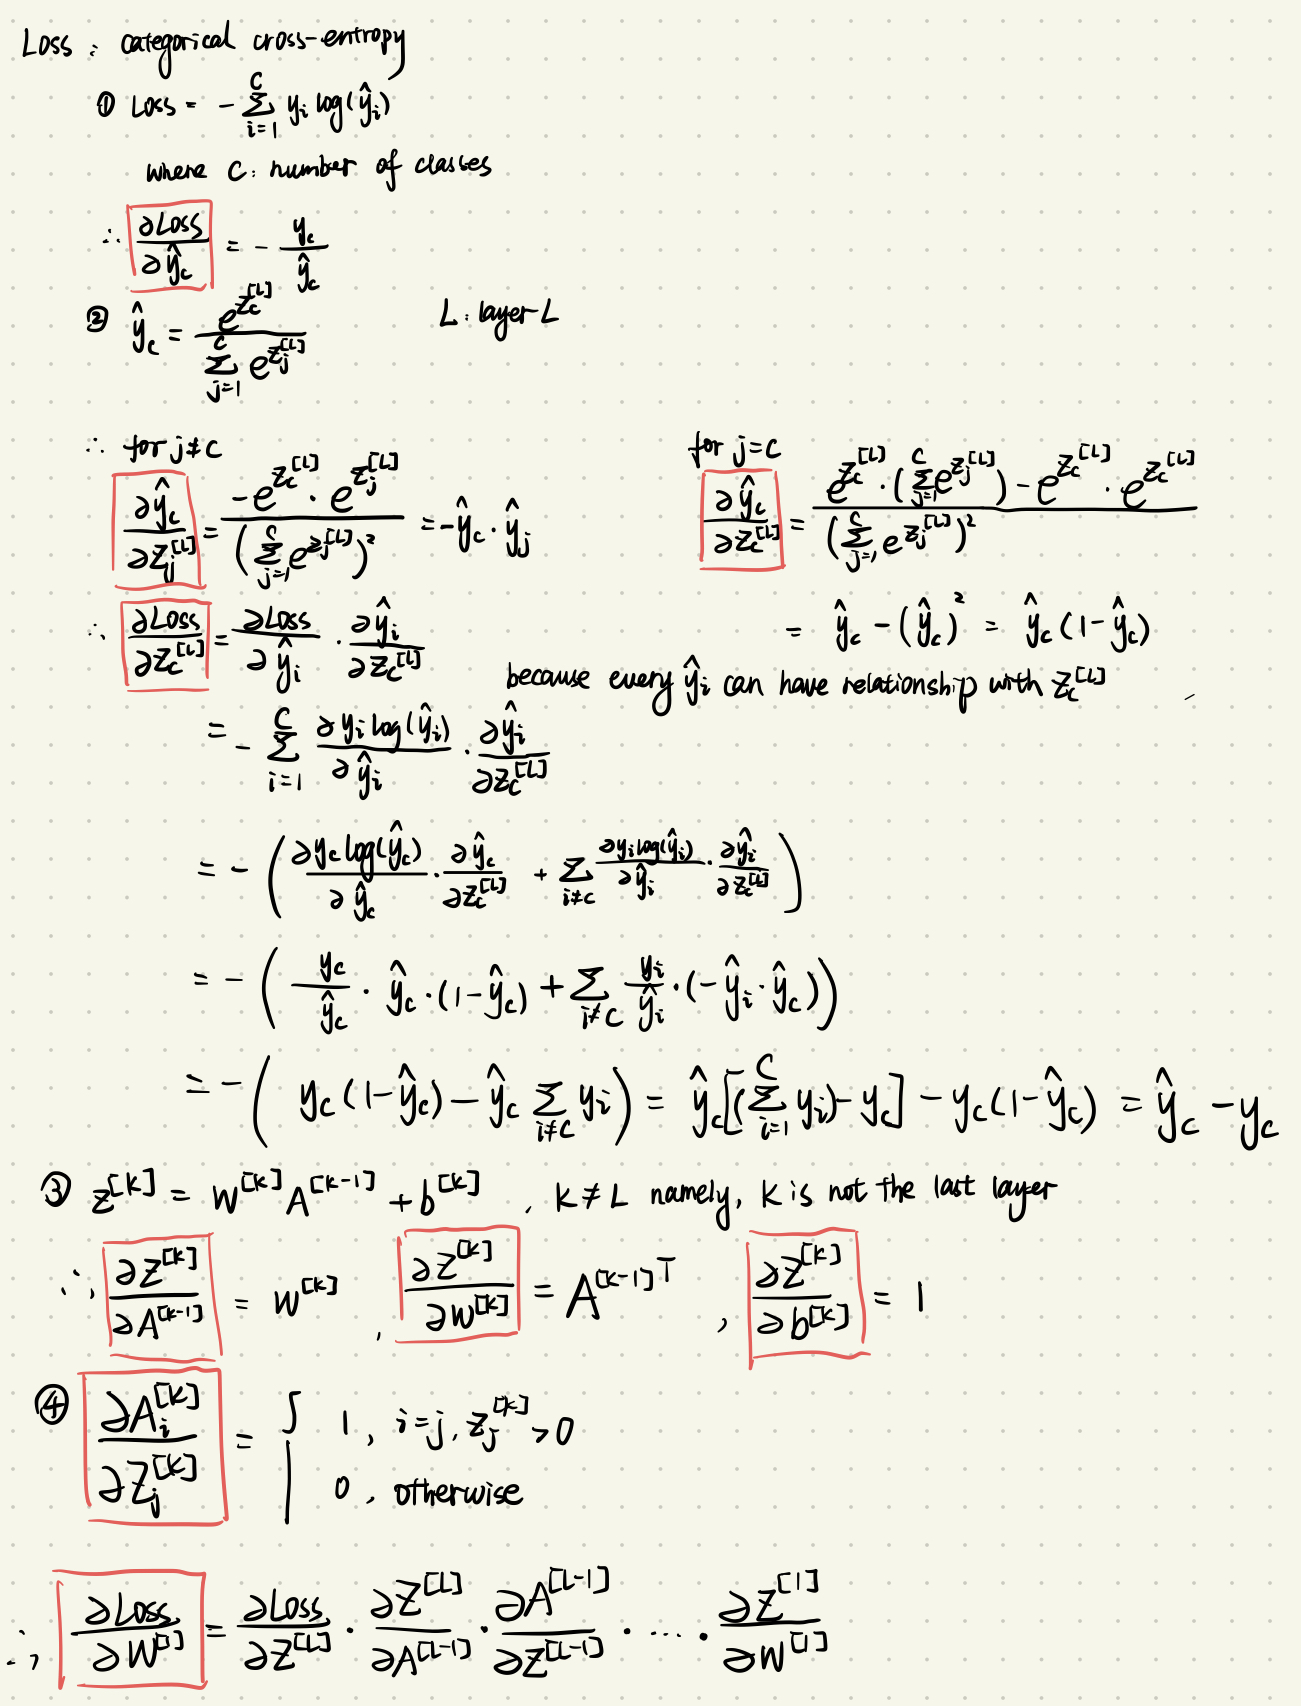

## Implementing the Network

Within this part, we'll construct functions associated with _training_ a neural network.

In particular, we'll develop functions for: 

- Initalizing network parameters,
- Performing forward propagation
- Perform backward propagation
- Update network parameters
- Computing the cost function

### (a) Parameter Initialization

Using the function wrote before to construct a function that initializes both the weights and the bias terms for each layer. The bias values should be initialized with 0 and the weights should be initialized using he_initialization

Implementation Guidelines:

- **Arguments:**
    - `layer_dims`: A **list** containing layer dimensions.
- **Return:**
    - `cache_params` with a dictionary data structure that contains:
       - `W_1` up to `W_L` matrices.
       - `b_1` up to `b_L` matrices.

_Hints:_ 

- Dictionaries can be constructed as empty sets with `dictionary_obj = {}`. 
- To dynamically add a new entry to a dictionary, use: `dictionary_obj[f'element_{i}'] = value`.
- NumPy has a built in way of generating a zero vector with [`np.zeros((n, p))`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)


As an example of the `cache_params` dictionary, consider the following dictionary structure. 

```python
import numpy as np

# Sample parameter cache
# Key: Value
my_cache = {
  'W_1': np.random.randn(64,784),
  'b_1': np.zeros((64,1)),
  'W_2': np.random.randn(10,64),
  'b_2': np.zeros((10,1))
}
```

From there, note that we can dynamically create layers using: 
```python
layer_shape = [ 784 , 64 , 10 ]
L = len(layer_shape)

layer_definitions = {}

for i in range(1, L):
  layer_definitions[ f'W_{i}' ] = (layer_shape[i], layer_shape[i - 1])
  layer_definitions[ f'b_{i}' ] = (layer_shape[i], 1)

layer_definitions
# {'W_1': (64, 784), 'W_2': (10, 64), 'b_1': (64, 1), 'b_2': (10, 1)}
```

Lastly, you may find the following dictionary print function useful for  debugging dictionaries. Please feel free to modify the key/cache. 

```python
def custom_numpy_dictionary_print( my_cache ): 
  # Display layer name next to its shape
  for num_idx, key in enumerate(my_cache):
    print(f"{key}:{my_cache.get(key,'none').shape}")

custom_numpy_dictionary_print(my_cache)
```
----


In [12]:
import numpy as np
def init(layer_dims):
  n = len(layer_dims)
  cache_params = {}
  for i in range(1,n):
    cache_params[f'W_{i}'] = he_initialization(n_out= layer_dims[i], n_in=layer_dims[i-1])
    cache_params[f'b_{i}'] = np.zeros((layer_dims[i],1))

  return cache_params

In [13]:
# test
def custom_numpy_dictionary_print( my_cache ): 
  # Display layer name next to its shape
  for num_idx, key in enumerate(my_cache):
    print(f"{key}:{my_cache.get(key,'none').shape}")
my_cache = init([4,3,5,6])
test_cache = custom_numpy_dictionary_print(my_cache)

W_1:(3, 4)
b_1:(3, 1)
W_2:(5, 3)
b_2:(5, 1)
W_3:(6, 5)
b_3:(6, 1)


### (b) Forward propagation

Implement a function that performs the forward propagation
and caches (saves) the value computed at each node on the computational graph.
Please use the element-wise activation functions written in **Exercise 2 (b)**. 

Implementation Guidelines:

- **Arguments:**
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` with a dictionary data structure.
- **Return:**
    - `cache_forward` with a dictionary data structure that contains:
       - `Z_1` up to `Z_L`
       - `A_1` up to `A_L`

_Note:_ $Z^{[L]} \rightarrow A^{[L]}$ will provide the softmax output that gives $\hat y$. 

_Hints:_

- Recall that items in a dictionary data structure can be accessed with `data["item"]`.
- Note that from $A^{[1]}$ up to $A^{[L-1]}$ will use the same activation function.


In [14]:
def forward(X,cache_parameters):

  cache_forward = {}
  L = len(cache_parameters)//2

  for i in range(1,L+1):
    W = cache_parameters[f'W_{i}']
    b = cache_parameters[f'b_{i}']
    if i == 1:
      Z = W @ X + b 
    else:
      Z = W @ A + b

    A = relu(Z) if i != L else softmax_stable(Z)

    cache_forward[f'Z_{i}'] = Z
    cache_forward[f'A_{i}'] = A
  
  return cache_forward

### Backward propagation

Implement a function that performs the backward propagation
at each node on the computational graph. Please use the back propagation equations derived before.

- **Arguments:**
    - `Y` a matrix of dimension `1 X n_e`.
    - `X` a matrix of dimension `m X n_e`.
    - `cache_params` a data dictionary.
    - `cache_forward` a data dictionary.
- **Return:**
    - `cache_grad` with a dictionary data structure that contains:
       - `dW_1` up to `dW_L`
       - `db_1` up to `db_L`

_Hint_: To ensure that the bias terms remain as 1D vectors, please use 

```python
db = np.sum("gradient code here for bias", axis = 1, keepdims = True)
```

In [15]:
def backward(Y,X,cache_params,cache_forward):
  cache_grad = {}
  L = len(cache_forward)//2
  y_hat = cache_forward[f'A_{L}']
  delta = softmax_prime_under_cce(y=Y, y_hat=y_hat) #d(loss)/d(z)
  for i in range(L,0,-1):
    if i > 1:
      A = cache_forward[f'A_{i-1}']
    else:
      A = X # it's exactly X
 
    cache_grad[f'dW_{i}'] = (A @ delta).T
    cache_grad[f'db_{i}'] = np.sum(delta.T,axis=1,keepdims=True)

    if i > 1:
      relu_p = relu_prime(cache_forward[f'Z_{i-1}'])
      delta = delta @ cache_params[f'W_{i}'] * relu_p.T
  return cache_grad

### Parameter Update

With the backward propagation calculations in hand, the
next step is to update the parameters in the neural network. The update
step should be performed using **Batch Gradient Descent (BGD)**, or all the possible observations.

- **Arguments:**
    - `alpha` the learning rate parameter.
    - `cache_params` a data dictionary containing parameters.
    - `cache_grad` a data dictionary containing the gradients.
- **Return:**
    - `cache_params` an updated version of the dictionary data structure that contains:
       - `W_1` up to `W_L`
       - `b_1` up to `b_L`


In [16]:
def update(alpha,cache_params,cache_grad):
  n = len(cache_params)//2
  for i in range(1,n+1):
    cache_params[f'W_{i}'] = cache_params[f'W_{i}'] - alpha * cache_grad[f'dW_{i}']
    cache_params[f'b_{i}'] = cache_params[f'b_{i}'] - alpha * cache_grad[f'db_{i}']

  return cache_params

### Model Training Wrapper

Create a function that encases all of the prior functions. This function should
perform the training and provide side-effects of the training process. 

- **Arguments:**
    - `Y` a matrix of dimension `n_C X n_e`.
    - `X` a matrix of dimension `m X n_e`.
    - `layer_shapes` a **list** containing the size of each layer.
    - `alpha` the learning rate parameter. Default `1e-3`. 
    - `epochs` the total number of times to train. Default `50`.
- **Side-effect**
    - Every 10 iterations output the iteration number and the present cost.
- **Return:**
    - `y_hat` the predicted probabilities for the network
    - `cache_parameters` with a dictionary data structure that contains:
       - `W_1` up to `W_L`
       - `b_1` up to `B_L`
    - `cost_history` the cost value from each epoch.

In [17]:
def train(Y,X,layer_shapes,alpha=1e-3,epochs=50):
  cache_params = init(layer_dims=layer_shapes)
  n = len(layer_shapes) - 1
  cost_history = []
  for i in range(epochs):
    cache_forward = forward(X,cache_params)
    Y_hat = cache_forward[f'A_{n}']
    cost = CE(Y_hat,Y)
    cost_history.append(cost)
    cache_grad = backward(Y,X,cache_params,cache_forward)
    cache_params = update(alpha,cache_params,cache_grad)
    accuracy = np.mean(np.argmax(Y_hat,axis=0) == np.argmax(Y,axis=0))
    if (i+1)%10 == 0:
      print(f"iteration number: {i+1}, present cost: {cost}, accuracy: {accuracy}")
  y_hat = Y_hat
  cache_parameters = cache_params
  return y_hat,cache_parameters,cost_history

## It's Alive!

In this part, we put everything together from the previous parts and train our network from scratch!

### Training the Model

In this exercise, perform the full network training on the shaped MNIST Fashion data. 

Create a neural network with at least 3 layers. The first layer should have at least 64 neurons. After that, how the neural network is designed is entirely up to you.

Begin the training routine by using **50 epochs** with a learning rate of **0.005**. Change these values _as needed_ to improve predictive quality of the network.

**Note:** Make sure to run the hidden code chunk and the reshaping code you wrote prior to training the code within this cell

In [18]:
y_hat,cache_parameters,cost_history = train(Y=y_train_onehot,X=x_train_reshaped,layer_shapes=[784,66,80,36,10],alpha=0.01,epochs=2000)

iteration number: 10, present cost: 2.183677030759626, accuracy: 0.23178333333333334
iteration number: 20, present cost: 2.0247218588604374, accuracy: 0.37343333333333334
iteration number: 30, present cost: 1.8881602940919031, accuracy: 0.45811666666666667
iteration number: 40, present cost: 1.7618761348962915, accuracy: 0.48746666666666666
iteration number: 50, present cost: 1.6453799429325868, accuracy: 0.5071666666666667
iteration number: 60, present cost: 1.5387284808363753, accuracy: 0.52465
iteration number: 70, present cost: 1.4411721616069515, accuracy: 0.5467333333333333
iteration number: 80, present cost: 1.3525535872676577, accuracy: 0.5755333333333333
iteration number: 90, present cost: 1.273224659994416, accuracy: 0.6122
iteration number: 100, present cost: 1.2037158875697287, accuracy: 0.63895
iteration number: 110, present cost: 1.1435774443065099, accuracy: 0.6533666666666667
iteration number: 120, present cost: 1.091899611220692, accuracy: 0.6622333333333333
iteration 

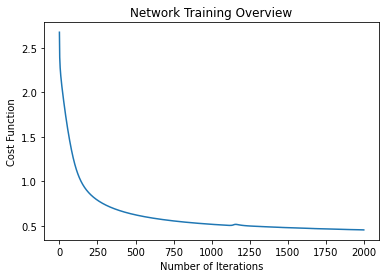

In [19]:
# Visualization code
import matplotlib.pyplot as plt
# Must have variable named as `cost_history` with 1 dimension.
plt.plot(cost_history)
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.title('Network Training Overview')
plt.show()


### Predicting the Model

Use the model parameters obtained from training the network to make predictions on the data. Consider creating a prediction function to aide in this
task.

- **Arguments:**
    - `X` a matrix of dimension `m X n_e`.
    - `cache_parameters` a dictionary data structure that contains estimated parameters.
- **Return:**
    - `prediction` predicted values

_Hint:_ Logic for this was rewritten during the forward propagation step. 


In [20]:
def predict(X,cache_parameters):
  temp = forward(X,cache_parameters)
  L = len(temp)//2
  prediction = temp[f'A_{L}']
  return prediction

The following should be used to show the image alongside of its predicted
class.

Note: 

- [`np.argmax(data)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) returns the index of the highest value.
- [`np.maximum(data)`](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html) returns the highest value.

In [21]:
prediction = predict(x_test_reshaped,cache_parameters)

Please make sure to run this prior code chunk, prior to running the prediction plot.

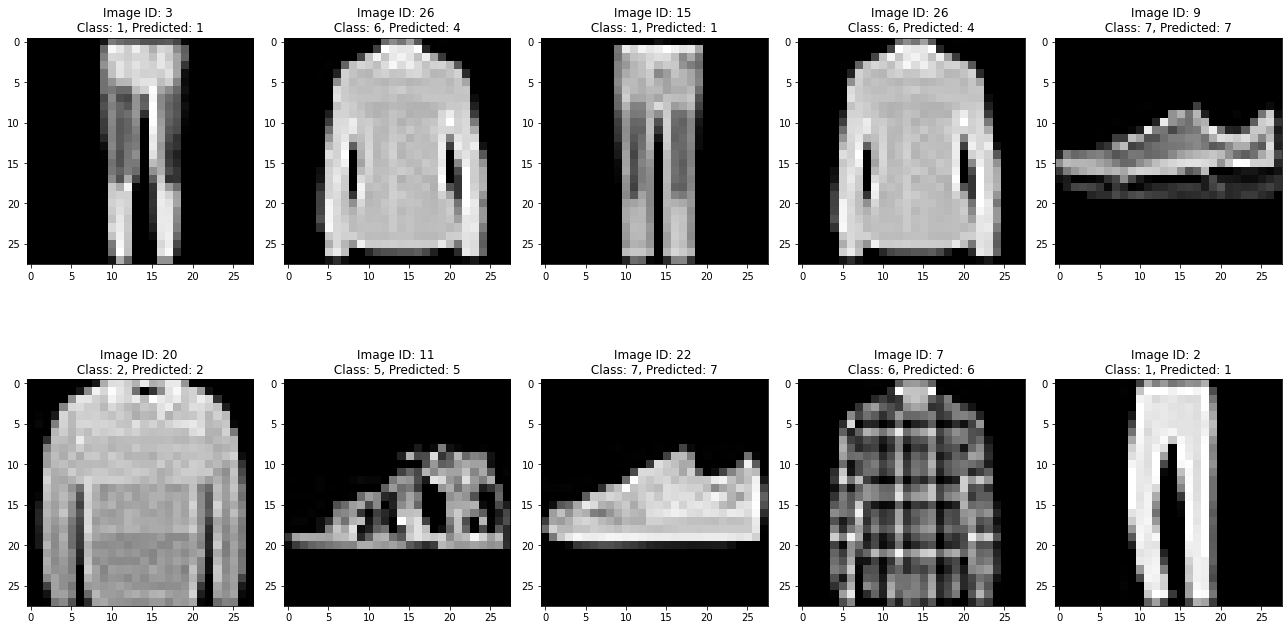

In [22]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist_viz = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train_viz, y_train_viz), (x_test_viz, y_test_viz) = fashion_mnist_viz.load_data()
# Perform scaling
x_train_viz, x_test_viz = x_train_viz / 255.0, x_test_viz / 255.0

# Set seed for reproducibility
np.random.seed(20)

# Obtain a set of indices to obtain predictions
idx = list(np.random.randint(x_test_viz.shape[1], size = 10))

# Increase the figure size
plt.subplots(figsize=(18, 10))

# Iterate through 10 training examples
for i in range(10):
  obs = idx[i]                           # Retrieve the index
  plt.subplot(2, 5, i+1)                 # Create a subplot
  img = x_test_viz[obs].reshape((28,28)) # Examples x Width x Height
  pred = np.argmax(prediction[:, obs])   # Obtain the highest index
  plt.imshow(img, cmap='gray')           # Plot gray scale
  plt.title(f'Image ID: {obs} \n Class: {y_test_viz[obs]}, Predicted: {pred} ')

plt.tight_layout()

In [23]:
accuracy = np.mean(np.argmax(prediction,axis=0) == y_test)
accuracy

0.8306